In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

higgs=pd.read_csv('/content/Higgs Boson dataset.csv')

In [ ]:
higgs.shape

(250000, 33)

In [ ]:
higgs.shape

(250000, 33)

In [ ]:
higgs.isna().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

As there are so less missing values,we don't have to handle them seperately

In [ ]:
higgs.isnull().values.any()

False

In [ ]:
print(higgs['Label'].value_counts())

b    164333
s     85667
Name: Label, dtype: int64


In [ ]:
higgs.isna().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

We try to check how the labels are distributed

In [ ]:
higgs.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
higgs.drop(columns=['Weight'],inplace=True)

In [ ]:
higgs.head()


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b


Performing label encoding

In [ ]:
for index in higgs.index:
  if higgs.loc[index,'Label']=='s':
    higgs.loc[index,'Label']=1
  else:
    higgs.loc[index,'Label']=0


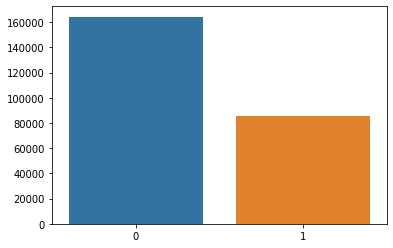

In [ ]:
ax = sns.barplot(x=higgs['Label'].value_counts().index, y=higgs['Label'].value_counts().values)


In [ ]:
higgs.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [ ]:
higgs.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

DATA PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
X = higgs.drop(columns="Label")
Y = higgs["Label"]


In [ ]:
X

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [ ]:
X.drop(columns=['EventId'],inplace=True)

In [ ]:
X.head(56)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


PERFORMING FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
scaled_df=scaling.fit_transform(X)

In [ ]:
scaled_df=pd.DataFrame(data=scaled_df,columns=[X.columns])

In [ ]:
scaled_df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.519149,0.074854,0.068128,0.009869,0.992464,0.188101,0.986193,0.521549,0.014789,0.083957,0.077816,0.993635,0.9992,0.016977,0.703763,0.560630,0.047964,0.954073,0.115850,0.005880,0.455920,0.123125,0.666667,0.503137,0.997659,0.997309,0.607433,0.996751,0.994395,0.069484
1,0.529404,0.099653,0.072155,0.016983,0.000000,0.000000,0.000000,0.596238,0.000733,0.043764,0.042178,1.000000,0.0000,0.029572,0.908327,0.020847,0.020435,0.600240,0.516391,0.015689,0.195099,0.075802,0.333333,0.493130,0.996239,0.998021,0.000000,0.000000,0.000000,0.028300
2,0.000000,0.235006,0.089071,0.012570,0.000000,0.000000,0.000000,0.536888,0.003293,0.083987,0.189040,1.000000,0.0000,0.016327,0.359087,0.166932,0.178578,0.309904,0.667409,0.019059,0.152132,0.123969,0.333333,0.492199,0.997563,0.994842,0.000000,0.000000,0.000000,0.027091
3,0.521630,0.117983,0.055557,0.000146,0.000000,0.000000,0.000000,0.566472,0.000146,0.016533,0.116952,0.045615,0.0000,0.003556,0.168935,0.501591,0.051137,0.395966,0.006684,0.010896,0.509548,0.036368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.536216,0.024512,0.095662,0.005787,0.000000,0.000000,0.000000,0.672571,0.005787,0.006576,0.051151,0.010255,0.0000,0.011028,0.060448,0.144971,0.007064,0.659545,0.749682,0.000920,0.361394,0.019823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.000000,0.104321,0.022501,0.001778,0.000000,0.000000,0.000000,0.216216,0.001778,0.005419,0.061391,0.000000,0.0000,0.006386,0.417334,0.355983,0.009615,0.310503,0.560471,0.016327,0.954965,0.065813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
249996,0.000000,0.084308,0.045981,0.007915,0.000000,0.000000,0.000000,0.434076,0.007915,0.002499,0.056524,0.024399,0.0000,0.004589,0.178143,0.941757,0.002250,0.561701,0.665818,0.016404,0.362031,0.033528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
249997,0.504082,0.087709,0.051756,0.014024,0.000000,0.000000,0.000000,0.398466,0.007825,0.041165,0.058552,0.687058,0.0000,0.021005,0.446958,0.001591,0.031508,0.576278,0.635423,0.008201,0.040102,0.093066,0.333333,0.491133,0.997310,0.996700,0.000000,0.000000,0.000000,0.025708
249998,0.499287,0.028058,0.046524,0.004763,0.000000,0.000000,0.000000,0.576516,0.004763,0.005400,0.048261,1.000000,0.0000,0.010672,0.057646,0.944303,0.003584,0.325679,0.452896,0.004236,0.629058,0.049761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_df,Y,test_size=0.3,random_state=42)
  

In [ ]:
X_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
192448,0.516190,0.078260,0.066810,0.000753,0.000000,0.000000,0.000000,0.507852,0.000753,0.026454,0.065649,0.004950,0.000000,0.026999,0.017614,0.935232,0.052017,0.129992,0.467855,0.005078,0.051878,0.078845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
139604,0.501375,0.017421,0.041672,0.013331,0.997187,0.279621,0.975663,0.439554,0.000071,0.050656,0.038122,0.977016,0.999926,0.017075,0.838070,0.004297,0.000255,0.642772,0.617919,0.007520,0.699554,0.076679,0.666667,0.490207,0.998272,0.994434,0.603171,0.992622,0.996575,0.048217
140914,0.507475,0.040390,0.042419,0.034343,0.993188,0.203484,0.984213,0.316107,0.024471,0.140458,0.041975,0.986917,0.999771,0.027832,0.242794,0.002228,0.018021,0.186701,0.697008,0.019459,0.798536,0.179037,1.000000,0.530839,0.995186,0.995325,0.610887,0.993551,0.998976,0.136814
80088,0.507476,0.022390,0.054837,0.007170,0.000000,0.000000,0.000000,0.503104,0.010901,0.044896,0.056676,0.013791,0.000000,0.020757,0.746397,0.840070,0.028637,0.874401,0.379694,0.005684,0.283418,0.071402,0.333333,0.495123,0.995933,0.999006,0.000000,0.000000,0.000000,0.030885
72918,0.511798,0.022322,0.060648,0.011767,0.000000,0.000000,0.000000,0.467495,0.008448,0.040655,0.069097,0.097595,0.000000,0.021010,0.610689,0.522597,0.045410,0.750399,0.948759,0.005761,0.035010,0.073339,0.333333,0.487193,0.996701,0.995590,0.000000,0.000000,0.000000,0.020595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.490126,0.062890,0.036658,0.008616,0.000000,0.000000,0.000000,0.544558,0.008616,0.000899,0.058704,0.998939,0.000000,0.002210,0.654524,0.604233,0.000155,0.884984,0.131127,0.008148,0.474061,0.080694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103694,0.521151,0.082311,0.067346,0.019939,0.000000,0.000000,0.000000,0.459642,0.008671,0.054147,0.028997,0.972772,0.000000,0.056058,0.267614,0.280872,0.022900,0.188099,0.851846,0.008726,0.223902,0.086964,0.333333,0.492056,0.995532,0.997739,0.000000,0.000000,0.000000,0.026905
131932,0.495778,0.075369,0.046052,0.012251,0.992220,0.182277,0.984067,0.415814,0.001101,0.052519,0.061442,0.174682,0.999001,0.002642,0.420737,0.735837,0.003096,0.833666,0.516232,0.015411,0.248090,0.106974,0.666667,0.498110,0.995968,0.999985,0.600754,0.996630,0.997529,0.055926
146867,0.487387,0.074566,0.036863,0.007009,0.000000,0.000000,0.000000,0.314828,0.007009,0.011390,0.064990,0.002122,0.000000,0.011598,0.553843,0.096595,0.022543,0.661741,0.801241,0.008150,0.468810,0.049879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_test

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
38683,0.518192,0.046578,0.066141,0.008470,0.000000,0.000000,0.000000,0.445946,0.008470,0.019326,0.022914,0.154880,0.000000,0.045733,0.494195,0.266709,0.001814,0.173323,0.602005,0.014257,0.763367,0.079340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
64939,0.512156,0.107187,0.049691,0.000688,0.000000,0.000000,0.000000,0.542915,0.000688,0.015426,0.104380,0.876238,0.000000,0.005121,0.795837,0.150382,0.045213,0.660942,0.655474,0.009558,0.150064,0.014160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3954,0.508071,0.111991,0.058265,0.000493,0.000000,0.000000,0.000000,0.474799,0.000493,0.022637,0.086434,0.021216,0.000000,0.015600,0.506605,0.293921,0.054993,0.599641,0.853119,0.009780,0.412158,0.029128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
120374,0.507953,0.054651,0.053416,0.025940,0.993055,0.181230,0.983907,0.338568,0.000769,0.072413,0.031583,0.987977,0.999946,0.047812,0.279624,0.310789,0.020999,0.274161,0.638924,0.008165,0.417887,0.105969,0.666667,0.492901,0.993816,0.999053,0.602955,0.995314,0.993854,0.051485
172861,0.000000,0.118862,0.036766,0.005414,0.000000,0.000000,0.000000,0.316837,0.005414,0.009236,0.071682,0.000000,0.000000,0.007401,0.278423,0.843412,0.021109,0.476038,0.109803,0.019059,0.475016,0.042851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246904,0.472534,0.082727,0.020586,0.001716,0.000000,0.000000,0.000000,0.224982,0.001716,0.002411,0.053026,0.000354,0.000000,0.005524,0.265612,0.301400,0.000648,0.364617,0.086092,0.012304,0.697804,0.039888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
213577,0.000000,0.126146,0.052301,0.002717,0.000000,0.000000,0.000000,0.383492,0.002717,0.012664,0.093633,0.038190,0.000000,0.005149,0.725380,0.131127,0.035838,0.397963,0.389879,0.015328,0.826225,0.046572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
175132,0.491565,0.043213,0.038849,0.000478,0.000000,0.000000,0.000000,0.493426,0.000478,0.004619,0.058248,0.001768,0.000000,0.006445,0.918935,0.389720,0.006832,0.746605,0.947008,0.003319,0.600255,0.020380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75216,0.483930,0.080391,0.033583,0.000409,0.000000,0.000000,0.000000,0.395727,0.000409,0.004549,0.077664,0.014851,0.000000,0.001431,0.186950,0.252228,0.013581,0.322883,0.614418,0.009003,0.012094,0.032003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Y_test

38683     0
64939     0
3954      0
120374    1
172861    0
         ..
246904    0
213577    0
175132    0
75216     0
145446    0
Name: Label, Length: 75000, dtype: object

In [ ]:
Y_test=Y_test.astype('int')

In [ ]:
Y_train

192448    0
139604    0
140914    0
80088     0
72918     0
         ..
119879    0
103694    1
131932    0
146867    0
121958    0
Name: Label, Length: 175000, dtype: object

In [ ]:
X_test.isna().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
dtype: int

In [ ]:
X_train.isna().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
dtype: int

In [ ]:
Y_train=Y_train.astype('int')

In [ ]:
Y_train.dtypes

dtype('int64')

In [ ]:
Y_test.dtypes

dtype('int64')

PERFORMING SMOTE TO HANDLE THE IMBALANCE IN THE DATA

In [ ]:
from collections import Counter

In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,Y_train_ns=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


The number of classes before fit Counter({0: 114778, 1: 60222})
The number of classes after fit Counter({0: 107878, 1: 79183})


In [ ]:
X_train_ns

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.516190,0.078260,0.066810,0.000753,0.000000,0.000000,0.000000,0.507852,0.000753,0.026454,0.065649,0.004950,0.000000,0.026999,0.017614,0.935232,0.052017,0.129992,0.467855,0.005078,0.051878,0.078845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.501375,0.017421,0.041672,0.013331,0.997187,0.279621,0.975663,0.439554,0.000071,0.050656,0.038122,0.977016,0.999926,0.017075,0.838070,0.004297,0.000255,0.642772,0.617919,0.007520,0.699554,0.076679,0.666667,0.490207,0.998272,0.994434,0.603171,0.992622,0.996575,0.048217
2,0.507475,0.040390,0.042419,0.034343,0.993188,0.203484,0.984213,0.316107,0.024471,0.140458,0.041975,0.986917,0.999771,0.027832,0.242794,0.002228,0.018021,0.186701,0.697008,0.019459,0.798536,0.179037,1.000000,0.530839,0.995186,0.995325,0.610887,0.993551,0.998976,0.136814
3,0.507476,0.022390,0.054837,0.007170,0.000000,0.000000,0.000000,0.503104,0.010901,0.044896,0.056676,0.013791,0.000000,0.020757,0.746397,0.840070,0.028637,0.874401,0.379694,0.005684,0.283418,0.071402,0.333333,0.495123,0.995933,0.999006,0.000000,0.000000,0.000000,0.030885
4,0.511798,0.022322,0.060648,0.011767,0.000000,0.000000,0.000000,0.467495,0.008448,0.040655,0.069097,0.097595,0.000000,0.021010,0.610689,0.522597,0.045410,0.750399,0.948759,0.005761,0.035010,0.073339,0.333333,0.487193,0.996701,0.995590,0.000000,0.000000,0.000000,0.020595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187056,0.504469,0.027284,0.038801,0.046957,0.992672,0.181091,0.984333,0.234691,0.000281,0.094421,0.054869,0.970342,0.999061,0.026472,0.617811,0.564543,0.029744,0.453227,0.373548,0.023771,0.430079,0.113973,0.666667,0.512631,0.996453,0.999566,0.608272,0.995336,0.997553,0.082688
187057,0.535415,0.004914,0.062825,0.018407,0.993888,0.193086,0.982455,0.429988,0.000372,0.083294,0.018213,0.896478,0.999801,0.076204,0.532976,0.908133,0.006405,0.546022,0.314791,0.017432,0.300977,0.105389,0.666667,0.496209,0.995236,0.998320,0.602550,0.995709,0.996309,0.055352
187058,0.499299,0.016367,0.044834,0.000717,0.000000,0.000000,0.000000,0.516424,0.000717,0.010829,0.035411,0.002820,0.000000,0.023811,0.255693,0.368670,0.003634,0.345998,0.891075,0.004362,0.788142,0.036626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187059,0.505321,0.072081,0.047676,0.011684,0.000000,0.000000,0.000000,0.428808,0.011684,0.016667,0.084998,0.968931,0.000000,0.010883,0.210580,0.203488,0.041383,0.238593,0.609271,0.005756,0.265602,0.092718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)
clf.fit(X_train_ns,Y_train_ns)
Y_pred=clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [ ]:

print ("Accuracy : ", accuracy_score(Y_test, Y_pred))
print("Precision-score : ", precision_score(Y_test, Y_pred))
print("Recall-score:", recall_score(Y_test, Y_pred))
print("Confusion-matrix:", classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy :  0.7454266666666667
Precision-score :  0.6137454337081871
Recall-score: 0.6734918451562193
Confusion-matrix:               precision    recall  f1-score   support

           0       0.82      0.78      0.80     49555
           1       0.61      0.67      0.64     25445

    accuracy                           0.75     75000
   macro avg       0.72      0.73      0.72     75000
weighted avg       0.75      0.75      0.75     75000

[[38770 10785]
 [ 8308 17137]]


LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING

In [ ]:
param_grid={
            "C": [1,2,4,8,16],
            "solver":['newton-cg','liblinear']}

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid,cv=5,n_jobs=-1,scoring='precision')

In [ ]:
grid.fit(X_train_ns,Y_train_ns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 4, 8, 16],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='precision')

In [ ]:
grid.best_params_

{'C': 8, 'solver': 'liblinear'}

In [ ]:
clf=LogisticRegression(C=8,solver='liblinear',random_state=42)

In [ ]:
clf.fit(X_train_ns,Y_train_ns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=8, random_state=42, solver='liblinear')

In [ ]:
Y_pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))
print("Precision-score : ", precision_score(Y_test, Y_pred))
print("Recall-score:", recall_score(Y_test, Y_pred))
print("Confusion-matrix:", classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy :  0.7473733333333333
Precision-score :  0.6167780892818633
Recall-score: 0.6743957555511888
Confusion-matrix:               precision    recall  f1-score   support

           0       0.82      0.78      0.80     49555
           1       0.62      0.67      0.64     25445

    accuracy                           0.75     75000
   macro avg       0.72      0.73      0.72     75000
weighted avg       0.75      0.75      0.75     75000

[[38893 10662]
 [ 8285 17160]]


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_ns,Y_train_ns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [ ]:
Y_pred=classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:

print ("Accuracy : ", accuracy_score(Y_test, Y_pred))
print("Precision-score : ", precision_score(Y_test, Y_pred))
print("Recall-score:", recall_score(Y_test, Y_pred))
print("Confusion-matrix:", classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy :  0.76688
Precision-score :  0.6449193577747843
Recall-score: 0.6961682059343682
Confusion-matrix:               precision    recall  f1-score   support

           0       0.84      0.80      0.82     49555
           1       0.64      0.70      0.67     25445

    accuracy                           0.77     75000
   macro avg       0.74      0.75      0.74     75000
weighted avg       0.77      0.77      0.77     75000

[[39802  9753]
 [ 7731 17714]]


RANDOM FOREST ON SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,Y_train_ns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [ ]:
Y_pred=classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))
print("Precision-score : ", precision_score(Y_test, Y_pred))
print("Recall-score:", recall_score(Y_test, Y_pred))
print("Confusion-matrix:", classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy :  0.8357066666666667
Precision-score :  0.7597893653244645
Recall-score: 0.7541756730202397
Confusion-matrix:               precision    recall  f1-score   support

           0       0.87      0.88      0.88     49555
           1       0.76      0.75      0.76     25445

    accuracy                           0.84     75000
   macro avg       0.82      0.82      0.82     75000
weighted avg       0.84      0.84      0.84     75000

[[43488  6067]
 [ 6255 19190]]


In [55]:
classifier

RandomForestClassifier()

WE CHOOSE RANDOM FOREST AS OUR FINAL MODEL AS IT GIVES US THE HIGHEST PRECISION AND RECALL SCORE FOR THE MINORITY CATEGORY(BACKGROUND EVENT)

In [56]:
import joblib
joblib.dump(classifier, "final_classification_model.pkl")

['final_classification_model.pkl']